In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow import keras
from sklearn.model_selection import train_test_split
import seaborn as sn
%matplotlib inline

In [ ]:
df = pd.read_csv('/customer_churn.csv')

In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
## convert object to number 

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.drop('customerID',axis=1,inplace=True)

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Totalcharges is number in the table but its data type is obj so there is some inconsistency in the data we need to rectify

In [ ]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull().sum()

11

In [ ]:
#11 non int values are there lets check those

In [ ]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:
#these are the cells with blank total charges hence the error
#since they are just 11 we can drop them

In [ ]:
df = df[df.TotalCharges!=' ']

In [ ]:
df.TotalCharges = pd.to_numeric(df.TotalCharges)

In [ ]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [ ]:
churn_no_t = df[df.Churn == 'No'].tenure

In [ ]:
churn_yes_t = df[df.Churn == 'Yes'].tenure

In [ ]:
churn_no_t

0        1
1       34
3       45
6       22
7       10
        ..
7037    72
7038    24
7039    72
7040    11
7042    66
Name: tenure, Length: 5163, dtype: int64

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


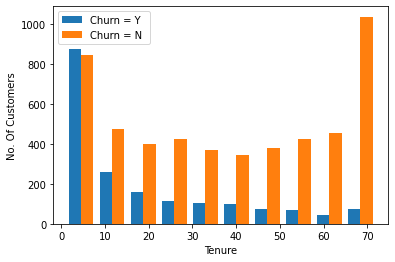

In [ ]:
plt.xlabel('Tenure')
plt.ylabel('No. Of Customers')
plt.hist([churn_yes_t,churn_no_t],label=['Churn = Y','Churn = N '])
plt.legend()

In [ ]:
# we can see that the customers who are from a long time have a very low churn rate while the churn rate for customers is high in the 0 -10 months range 

In [ ]:
# now lets see another based on the charges

In [ ]:
churn_no_c = df[df.Churn == 'No'].MonthlyCharges

In [ ]:
churn_yes_c = df[df.Churn == 'Yes'].MonthlyCharges

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


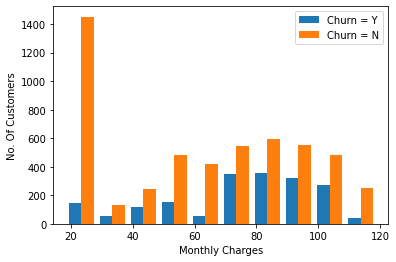

In [ ]:
plt.xlabel('Monthly Charges')
plt.ylabel('No. Of Customers')
plt.hist([churn_yes_c,churn_no_c],label = ['Churn = Y','Churn = N'])
plt.legend()

In [ ]:
# the straightforwad thing we can see from it is that for lower monthly charges the customer retention is the highest.

In [ ]:
# now converting all text data to no.s for model training

In [ ]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [ ]:
df.gender.unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
# too many headers lets use loop to display unique value for each column

In [ ]:
for i in df:
  # since we need to convert the text/object based columns so excluding the int obvious;y
  if df[i].dtypes == 'object':
    print('{}: {}'.format(i,df[i].unique()))

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [ ]:
#There are many columns where no has 2 entries with some being passive entries need to rectify those too first before int conversion

In [ ]:
# 7 columns to be precise

In [ ]:
df.replace('No phone service','No',inplace=True)

In [ ]:
df.replace('No internet service','No',inplace=True)

In [ ]:
dic = {}
for i in df:
  # since we need to convert the text/object based columns so excluding the int obvious;y
  if df[i].dtypes == 'object':

    dic[i]=df[i].unique()

In [ ]:
dic

{'Churn': array(['No', 'Yes'], dtype=object),
 'Contract': array(['Month-to-month', 'One year', 'Two year'], dtype=object),
 'Dependents': array(['No', 'Yes'], dtype=object),
 'DeviceProtection': array(['No', 'Yes'], dtype=object),
 'InternetService': array(['DSL', 'Fiber optic', 'No'], dtype=object),
 'MultipleLines': array(['No', 'Yes'], dtype=object),
 'OnlineBackup': array(['Yes', 'No'], dtype=object),
 'OnlineSecurity': array(['No', 'Yes'], dtype=object),
 'PaperlessBilling': array(['Yes', 'No'], dtype=object),
 'Partner': array(['Yes', 'No'], dtype=object),
 'PaymentMethod': array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
        'Credit card (automatic)'], dtype=object),
 'PhoneService': array(['No', 'Yes'], dtype=object),
 'StreamingMovies': array(['No', 'Yes'], dtype=object),
 'StreamingTV': array(['No', 'Yes'], dtype=object),
 'TechSupport': array(['No', 'Yes'], dtype=object),
 'gender': array(['Female', 'Male'], dtype=object)}

In [ ]:
len(dic['Churn'])

2

In [ ]:
# replacing all columns with 2 categorical variables to 1 or 0 respectively as for more than 2 we will be using one hot encoding to let all no.s between 0 & 1.
for i in dic:
  if len(dic[i]) == 2:
   df[i].replace({dic[i][0]:0,dic[i][1]:1},inplace=True)

In [ ]:
for i in df:
  # since we need to convert the text/object based columns so excluding the int obvious;y
  if df[i].dtypes == 'object':
    print('{}: {}'.format(i,df[i].unique()))

InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [ ]:
df1 = pd.get_dummies(data=df, columns=['InternetService','Contract','PaymentMethod'])

In [ ]:
df1.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [ ]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,29.85,29.85,0,1,0,0,1,0,0,0,0,1,0
1,1,0,1,0,34,1,0,1,1,1,0,0,0,1,56.95,1889.50,0,1,0,0,0,1,0,0,0,0,1
2,1,0,1,0,2,1,0,1,0,0,0,0,0,0,53.85,108.15,1,1,0,0,1,0,0,0,0,0,1
3,1,0,1,0,45,0,0,1,1,1,1,0,0,1,42.30,1840.75,0,1,0,0,0,1,0,1,0,0,0
4,0,0,1,0,2,1,0,0,1,0,0,0,0,0,70.70,151.65,1,0,1,0,1,0,0,0,0,1,0


In [ ]:
df1.shape

(7032, 27)

In [ ]:
df.shape

(7032, 20)

In [ ]:
#scaling our data since columns such as charges and tenure are way out of range from the others

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
norm = MinMaxScaler()

In [ ]:
df1[['tenure','MonthlyCharges','TotalCharges']] = norm.fit_transform(df1[['tenure','MonthlyCharges','TotalCharges']] )

In [ ]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,0,0.000000,0,0,0,0,0,0,0,0,0,0.115423,0.001275,0,1,0,0,1,0,0,0,0,1,0
1,1,0,1,0,0.464789,1,0,1,1,1,0,0,0,1,0.385075,0.215867,0,1,0,0,0,1,0,0,0,0,1
2,1,0,1,0,0.014085,1,0,1,0,0,0,0,0,0,0.354229,0.010310,1,1,0,0,1,0,0,0,0,0,1
3,1,0,1,0,0.619718,0,0,1,1,1,1,0,0,1,0.239303,0.210241,0,1,0,0,0,1,0,1,0,0,0
4,0,0,1,0,0.014085,1,0,0,1,0,0,0,0,0,0.521891,0.015330,1,0,1,0,1,0,0,0,0,1,0


In [ ]:
# all values are scaled lets go now

In [ ]:
X = df1.drop('Churn',axis=1)

In [ ]:
y = df1.Churn

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [ ]:
X_train.shape

(5274, 26)

In [ ]:
model = keras.Sequential()

In [ ]:
model.add(Dense(64,input_shape = (26,),activation='relu'))

In [ ]:
model.add(Dense(16,activation='relu'))

In [ ]:
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,epochs = 30)

Epoch 1/30
165/165 [==============================] - 1s 1ms/step - loss: 0.6005 - accuracy: 0.6421
Epoch 2/30
165/165 [==============================] - 0s 1ms/step - loss: 0.4334 - accuracy: 0.7965
Epoch 3/30
165/165 [==============================] - 0s 1ms/step - loss: 0.4260 - accuracy: 0.7937
Epoch 4/30
165/165 [==============================] - 0s 1ms/step - loss: 0.4347 - accuracy: 0.7961
Epoch 5/30
165/165 [==============================] - 0s 1ms/step - loss: 0.4122 - accuracy: 0.8068
Epoch 6/30
165/165 [==============================] - 0s 1ms/step - loss: 0.4133 - accuracy: 0.8019
Epoch 7/30
165/165 [==============================] - 0s 1ms/step - loss: 0.4209 - accuracy: 0.7950
Epoch 8/30
165/165 [==============================] - 0s 1ms/step - loss: 0.3999 - accuracy: 0.8193
Epoch 9/30
165/165 [==============================] - 0s 1ms/step - loss: 0.4135 - accuracy: 0.8028
Epoch 10/30
165/165 [==============================] - 0s 1ms/step - loss: 0.4074 - accuracy: 0.8078

In [ ]:
model.evaluate(X_test,y_test)

55/55 [==============================] - 0s 914us/step - loss: 0.4230 - accuracy: 0.8026


[0.4230008125305176, 0.8026165962219238]

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred 

array([[0.28603765],
       [0.7621943 ],
       [0.27295744],
       ...,
       [0.30088735],
       [0.02460793],
       [0.06464005]], dtype=float32)

In [ ]:
# Since we used sigmoid so anything >0.5 represents 1 here and less than that 0


In [ ]:
yp = []
for i in y_pred:
  if i >= 0.5:
    yp.append(1)
  else:
    yp.append(0)

In [ ]:
from sklearn.metrics import classification_report
print('Classification Report \n ',classification_report(y_test,yp))

Classification Report 
                precision    recall  f1-score   support

           0       0.85      0.89      0.87      1323
           1       0.62      0.53      0.57       435

    accuracy                           0.80      1758
   macro avg       0.74      0.71      0.72      1758
weighted avg       0.79      0.80      0.80      1758



In [ ]:
cm = tf.math.confusion_matrix(labels = y_test, predictions=yp)

Text(33.0, 0.5, 'Truth')

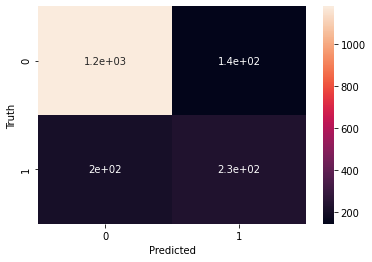

In [ ]:
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
## there is an  imbalance in our dataset lets try to handle that also to see if the accuracy increases

In [ ]:
## defining nn model func so that we don't have to repetitively create a new model

def NN_Model(X,y):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y)

    model = keras.Sequential()
    model.add(Dense(50, input_shape=(26,), activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    model.fit(X_train, y_train, epochs=50)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    

In [ ]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,0,0.000000,0,0,0,0,0,0,0,0,0,0.115423,0.001275,0,1,0,0,1,0,0,0,0,1,0
1,1,0,1,0,0.464789,1,0,1,1,1,0,0,0,1,0.385075,0.215867,0,1,0,0,0,1,0,0,0,0,1
2,1,0,1,0,0.014085,1,0,1,0,0,0,0,0,0,0.354229,0.010310,1,1,0,0,1,0,0,0,0,0,1
3,1,0,1,0,0.619718,0,0,1,1,1,1,0,0,1,0.239303,0.210241,0,1,0,0,0,1,0,1,0,0,0
4,0,0,1,0,0.014085,1,0,0,1,0,0,0,0,0,0.521891,0.015330,1,0,1,0,1,0,0,0,0,1,0


In [ ]:
# Under - Sampling

In [ ]:
df_0 = df1[df1.Churn == 0]

In [ ]:
df_1 = df1[df1.Churn == 1]

In [ ]:
len(df_0) , len(df_1)

(5163, 1869)

In [ ]:
df_0.sample(len(df_1)) # gives random samples of specified quantity from the dataframe

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2062,0,0,1,0,0.915493,1,1,0,1,0,0,0,0,0,0.068657,0.192107,0,0,0,1,0,0,1,0,1,0,0
5173,1,0,0,1,0.042254,1,0,0,1,0,0,0,0,1,0.264179,0.017407,0,1,0,0,1,0,0,0,0,1,0
1917,0,1,0,0,1.000000,1,1,1,0,1,1,1,1,1,0.704975,0.730856,0,1,0,0,0,0,1,0,1,0,0
870,0,0,0,0,1.000000,1,1,1,1,1,1,1,0,0,0.795522,0.807420,0,0,1,0,0,0,1,1,0,0,0
3793,0,0,1,0,0.112676,1,0,0,1,0,0,0,0,1,0.019900,0.019311,0,0,0,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3210,0,0,0,1,0.887324,1,0,1,1,0,1,1,0,1,0.473134,0.467251,0,1,0,0,0,1,0,0,0,0,1
6400,0,0,1,0,1.000000,1,1,1,0,0,0,0,0,1,0.412935,0.489984,0,1,0,0,0,0,1,1,0,0,0
2220,1,0,0,0,1.000000,1,0,1,0,0,1,1,1,0,0.607960,0.661718,0,1,0,0,0,0,1,1,0,0,0
3854,0,0,0,0,0.690141,1,1,1,0,0,1,1,1,0,0.909453,0.621625,0,0,1,0,1,0,0,1,0,0,0


In [ ]:
df_0_s = df_0.sample(len(df_1))

In [ ]:
df2 = pd.concat([df_0_s,df_1],axis=0)

In [ ]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2992,1,0,1,0,0.154930,0,0,0,0,0,1,0,0,1,0.156716,0.048886,0,1,0,0,1,0,0,0,0,0,1
2749,1,0,0,1,0.464789,1,1,0,1,1,0,1,1,1,0.586567,0.315601,0,1,0,0,0,1,0,1,0,0,0
2982,1,0,0,1,0.718310,1,0,0,1,0,0,0,0,0,0.025871,0.121486,0,0,0,1,0,1,0,0,1,0,0
6758,1,0,1,0,0.366197,1,0,0,1,0,0,0,0,0,0.011443,0.050940,0,0,0,1,1,0,0,0,1,0,0
2961,1,0,1,0,0.154930,1,0,0,0,0,1,0,0,0,0.353234,0.072681,0,1,0,0,1,0,0,0,0,0,1


In [ ]:
X = df2.drop('Churn',axis=1)

In [ ]:
y = df2.Churn

In [ ]:
NN_Model(X,y)

Epoch 1/50
88/88 [==============================] - 1s 1ms/step - loss: 0.6506 - accuracy: 0.6346
Epoch 2/50
88/88 [==============================] - 0s 1ms/step - loss: 0.5079 - accuracy: 0.7494
Epoch 3/50
88/88 [==============================] - 0s 1ms/step - loss: 0.4955 - accuracy: 0.7570
Epoch 4/50
88/88 [==============================] - 0s 1ms/step - loss: 0.5000 - accuracy: 0.7576
Epoch 5/50
88/88 [==============================] - 0s 1ms/step - loss: 0.4964 - accuracy: 0.7566
Epoch 6/50
88/88 [==============================] - 0s 1ms/step - loss: 0.4809 - accuracy: 0.7724
Epoch 7/50
88/88 [==============================] - 0s 1ms/step - loss: 0.4800 - accuracy: 0.7662
Epoch 8/50
88/88 [==============================] - 0s 1ms/step - loss: 0.4649 - accuracy: 0.7766
Epoch 9/50
88/88 [==============================] - 0s 2ms/step - loss: 0.4649 - accuracy: 0.7818
Epoch 10/50
88/88 [==============================] - 0s 1ms/step - loss: 0.4654 - accuracy: 0.7745
Epoch 11/50
88/88 [

In [ ]:
# f1 score for minority class increased significantly
# Lets try more techniques

In [ ]:
# Over-Sampling

In [ ]:
len(df_0),len(df_1)

(5163, 1869)

In [ ]:
df_1_s = df_1.sample(len(df_0), replace=True)

In [ ]:
len(df_1_s)

5163

In [ ]:
df3 = pd.concat([df_0,df_1_s],axis=0)

In [ ]:
X = df3.drop('Churn',axis=1)

In [ ]:
y = df3.Churn

In [ ]:
NN_Model(X,y)

Epoch 1/50
242/242 [==============================] - 1s 1ms/step - loss: 0.5939 - accuracy: 0.6837
Epoch 2/50
242/242 [==============================] - 0s 1ms/step - loss: 0.4826 - accuracy: 0.7694
Epoch 3/50
242/242 [==============================] - 0s 1ms/step - loss: 0.4709 - accuracy: 0.7742
Epoch 4/50
242/242 [==============================] - 0s 1ms/step - loss: 0.4682 - accuracy: 0.7829
Epoch 5/50
242/242 [==============================] - 0s 1ms/step - loss: 0.4621 - accuracy: 0.7815
Epoch 6/50
242/242 [==============================] - 0s 1ms/step - loss: 0.4585 - accuracy: 0.7832
Epoch 7/50
242/242 [==============================] - 0s 1ms/step - loss: 0.4640 - accuracy: 0.7836
Epoch 8/50
242/242 [==============================] - 0s 1ms/step - loss: 0.4547 - accuracy: 0.7889
Epoch 9/50
242/242 [==============================] - 0s 1ms/step - loss: 0.4457 - accuracy: 0.7909
Epoch 10/50
242/242 [==============================] - 0s 1ms/step - loss: 0.4460 - accuracy: 0.7900

In [ ]:
# accuracy is a little better than our original data set and also the f1 scores are  better too(way better for minority class).
#in this case over sampling really helped our use case

In [ ]:
# Using SMOTE ( replicating samples with the help of knn)

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
X = df1.drop('Churn',axis=1)

In [ ]:
y= df1.Churn

In [ ]:
sm = SMOTE()

In [ ]:
X_s , y_s = sm.fit_sample(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
len(X_s),len(y_s)

(10326, 10326)

In [ ]:
NN_Model(X_s,y_s)

Epoch 1/50
242/242 [==============================] - 1s 1ms/step - loss: 0.5837 - accuracy: 0.6845
Epoch 2/50
242/242 [==============================] - 0s 1ms/step - loss: 0.4803 - accuracy: 0.7679
Epoch 3/50
242/242 [==============================] - 0s 1ms/step - loss: 0.4622 - accuracy: 0.7794
Epoch 4/50
242/242 [==============================] - 0s 1ms/step - loss: 0.4427 - accuracy: 0.7897
Epoch 5/50
242/242 [==============================] - 0s 1ms/step - loss: 0.4465 - accuracy: 0.7880
Epoch 6/50
242/242 [==============================] - 0s 1ms/step - loss: 0.4443 - accuracy: 0.7941
Epoch 7/50
242/242 [==============================] - 0s 1ms/step - loss: 0.4439 - accuracy: 0.7829
Epoch 8/50
242/242 [==============================] - 0s 1ms/step - loss: 0.4354 - accuracy: 0.7917
Epoch 9/50
242/242 [==============================] - 0s 1ms/step - loss: 0.4384 - accuracy: 0.7913
Epoch 10/50
242/242 [==============================] - 0s 1ms/step - loss: 0.4248 - accuracy: 0.8007

In [ ]:
# results are similar to normal over sampling not much benefit of SMOTE here

In [ ]:
#Ensembling(in under sampling when we are undersampling the majority class we can try create groups of the majority class in (majority/minority) no.s and do those no. of model testing and take the average of the same.

In [ ]:
len(df_0),len(df_1)

(5163, 1869)

In [ ]:
5163/1869

2.7624398073836276

In [ ]:
len(df_0[:1869])

1869

In [ ]:
df4 = pd.concat([df_0[:1869],df_1],axis=0)

In [ ]:
df5 = pd.concat([df_0[1869:3738],df_1],axis=0)

In [ ]:
df6 = pd.concat([df_0[3738:],df_1],axis=0)

In [ ]:
NN_Model(df4.drop('Churn',axis=1),df4.Churn)

Epoch 1/50
88/88 [==============================] - 1s 1ms/step - loss: 0.6166 - accuracy: 0.6843
Epoch 2/50
88/88 [==============================] - 0s 1ms/step - loss: 0.5124 - accuracy: 0.7495
Epoch 3/50
88/88 [==============================] - 0s 1ms/step - loss: 0.5002 - accuracy: 0.7532
Epoch 4/50
88/88 [==============================] - 0s 1ms/step - loss: 0.4798 - accuracy: 0.7709
Epoch 5/50
88/88 [==============================] - 0s 1ms/step - loss: 0.4796 - accuracy: 0.7643
Epoch 6/50
88/88 [==============================] - 0s 1ms/step - loss: 0.4764 - accuracy: 0.7770
Epoch 7/50
88/88 [==============================] - 0s 2ms/step - loss: 0.4953 - accuracy: 0.7603
Epoch 8/50
88/88 [==============================] - 0s 1ms/step - loss: 0.4845 - accuracy: 0.7618
Epoch 9/50
88/88 [==============================] - 0s 1ms/step - loss: 0.4584 - accuracy: 0.7897
Epoch 10/50
88/88 [==============================] - 0s 2ms/step - loss: 0.4887 - accuracy: 0.7700
Epoch 11/50
88/88 [

In [ ]:
NN_Model(df5.drop('Churn',axis=1),df5.Churn)

Epoch 1/50
88/88 [==============================] - 1s 1ms/step - loss: 0.6415 - accuracy: 0.6404
Epoch 2/50
88/88 [==============================] - 0s 1ms/step - loss: 0.5103 - accuracy: 0.7515
Epoch 3/50
88/88 [==============================] - 0s 1ms/step - loss: 0.4929 - accuracy: 0.7519
Epoch 4/50
88/88 [==============================] - 0s 1ms/step - loss: 0.5025 - accuracy: 0.7498
Epoch 5/50
88/88 [==============================] - 0s 1ms/step - loss: 0.4686 - accuracy: 0.7630
Epoch 6/50
88/88 [==============================] - 0s 1ms/step - loss: 0.4822 - accuracy: 0.7622
Epoch 7/50
88/88 [==============================] - 0s 1ms/step - loss: 0.4845 - accuracy: 0.7610
Epoch 8/50
88/88 [==============================] - 0s 1ms/step - loss: 0.4784 - accuracy: 0.7635
Epoch 9/50
88/88 [==============================] - 0s 1ms/step - loss: 0.4635 - accuracy: 0.7679
Epoch 10/50
88/88 [==============================] - 0s 1ms/step - loss: 0.4814 - accuracy: 0.7697
Epoch 11/50
88/88 [

In [ ]:
NN_Model(df6.drop('Churn',axis=1),df6.Churn)

Epoch 1/50
78/78 [==============================] - 1s 1ms/step - loss: 0.6081 - accuracy: 0.7050
Epoch 2/50
78/78 [==============================] - 0s 1ms/step - loss: 0.4999 - accuracy: 0.7593
Epoch 3/50
78/78 [==============================] - 0s 1ms/step - loss: 0.4806 - accuracy: 0.7758
Epoch 4/50
78/78 [==============================] - 0s 1ms/step - loss: 0.4795 - accuracy: 0.7716
Epoch 5/50
78/78 [==============================] - 0s 1ms/step - loss: 0.4532 - accuracy: 0.7835
Epoch 6/50
78/78 [==============================] - 0s 1ms/step - loss: 0.4669 - accuracy: 0.7913
Epoch 7/50
78/78 [==============================] - 0s 1ms/step - loss: 0.4679 - accuracy: 0.7838
Epoch 8/50
78/78 [==============================] - 0s 1ms/step - loss: 0.4498 - accuracy: 0.7920
Epoch 9/50
78/78 [==============================] - 0s 1ms/step - loss: 0.4603 - accuracy: 0.7950
Epoch 10/50
78/78 [==============================] - 0s 1ms/step - loss: 0.4616 - accuracy: 0.7776
Epoch 11/50
78/78 [

In [ ]:
(0.73+0.74+0.76)/3

0.7433333333333333

In [ ]:
# ensemble also didn't help in our case. Over sampling was the best solution for our imbalanced set